In [0]:
import warnings
import os
warnings.filterwarnings('ignore')
%matplotlib inline

In [0]:
import nltk
import numpy as np
import pandas as pd
import re
import spacy
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

In [29]:
df_raw = pd.read_csv("FB_Data.csv", low_memory=False)
print('Null check =', sum(df_raw['text'].isnull()))
df_raw = df_raw[~df_raw['text'].isnull()]
print("Null check again =",sum(df_raw['text'].isnull()))

Null check = 2
Null check again = 0


In [30]:
df_raw.head()

,text
0,anmol haryani pls try amazon or bookstores lik...
1,deepalakshmi durai
2,farhat siddiqui thank you ??. i got it
3,kanika mahajan thukral thanks
4,ekta bhatnagar bhardwaj ok thanks dear


In [88]:
all_tokens = []
stop_words = list(set(stopwords.words('english')))
stop_words += ['...', 'h']
for t in df_raw['text']:
    all_tokens += (nltk.word_tokenize(t))
print("total tokens =", len(all_tokens))
filtered_tokens = [w for w in all_tokens if w not in stop_words and w not in ',.?!']
print("filtered tokens =", len(filtered_tokens))
text = nltk.Text(filtered_tokens)
type(text)

total tokens = 714306
filtered tokens = 470733


nltk.text.Text

In [93]:
freq_dist = nltk.FreqDist(text)

50 most common tokens =
[('baby', 6143), ('hai', 3760), ('u', 3040), ('se', 2825), ('ho', 2728), ("n't", 2656), ('ko', 2584), ('k', 2545), ("'s", 2532), ('dear', 2529), ('yes', 2511), ('n', 2458), ('ki', 2407), ('hi', 2335), ('bhi', 2219), ('give', 2206), ('milk', 2203), ('also', 2117), ('use', 2049), ('ka', 1925), ('oil', 1828), ('nhi', 1803), ('normal', 1658), ('water', 1577), ('time', 1558), ('one', 1557), ('month', 1553), ('good', 1512), ('months', 1448), ('b', 1395), ('like', 1342), ('kya', 1296), ('weight', 1282), ('..', 1246), ('ur', 1244), ('2', 1219), ('1', 1194), ('ke', 1177), ('aap', 1161), ('mam', 1126), ('thanks', 1113), ('try', 1106), ('hota', 1079), ('plz', 1070), ('take', 1053), ('tha', 1052), ('thank', 1046), ('happy', 1046), ('please', 1044), ('mera', 993)]


In [0]:
chat_words = sorted(set(text))

## Token Recognition

In [0]:
def item_freq(related_list):
  n = 0
  for each in related_list:
    n += freq_dist[each]
  return n

In [0]:
# Products
oil_related_words = [w for w in chat_words if re.search('^oil', w)]
oil_sz = item_freq(oil_related_words)

lotion_related_words = [w for w in chat_words if re.search('^lotion', w)]
lotion_sz = item_freq(lotion_related_words)

ghee_related_words = [w for w in chat_words if re.search('^ghee', w)]
ghee_sz = item_freq(ghee_related_words)

product_sz = oil_sz + lotion_sz + ghee_sz


# Issues
itch_related_words = [w for w in chat_words if re.search('^itch', w)]
itch_sz = item_freq(itch_related_words)

rash_related_words = [w for w in chat_words if re.search('^rashe', w)] + ['rash']
rash_sz = item_freq(rash_related_words)

boil_related_words = [w for w in chat_words if re.search('^boils', w)]
boil_sz = item_freq(boil_related_words)

issue_sz = itch_sz + rash_sz + boil_sz

# Remedies
massage_related_words = [w for w in chat_words if re.search('^massag', w)]
massage_sz = item_freq(massage_related_words)

bath_related_words = [w for w in chat_words if re.search('^bath', w)]
bath_sz = item_freq(bath_related_words)

ketolin_related_words = [w for w in chat_words if re.search('^ketolin', w)]
ketolin_sz = item_freq(ketolin_related_words)

remedy_sz = massage_sz + bath_sz + ketolin_sz

# Brands
johnson_related_words = [w for w in chat_words if re.search('^johns', w)]
johnson_sz = item_freq(johnson_related_words)

himalaya_related_words = [w for w in chat_words if re.search('^himal', w)]
himalaya_sz = item_freq(himalaya_related_words)

sebamed_related_words = [w for w in chat_words if re.search('^sebam', w)]
sebamed_sz = item_freq(sebamed_related_words)

brand_sz = johnson_sz + himalaya_sz + sebamed_sz

In [228]:
print(remedy_sz)

453


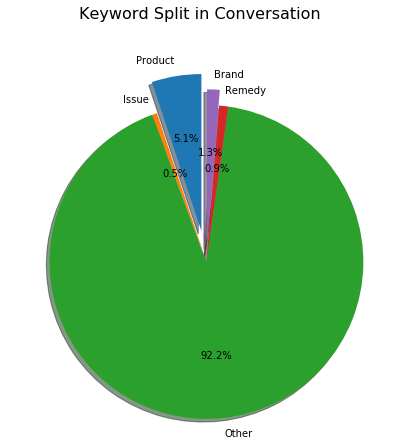

In [229]:
other_conv = len(df_raw) - product_sz - issue_sz + remedy_sz + brand_sz
labels = ['Product', 'Issue', 'Other', 'Remedy', 'Brand']
sizes = [product_sz, issue_sz, other_conv, remedy_sz, brand_sz]
explode = (0.2,0,0,0,0.1)

fig1, ax1 = plt.subplots(figsize=(7, 7))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig1.suptitle("Keyword Split in Conversation", fontsize=16)
plt.show()

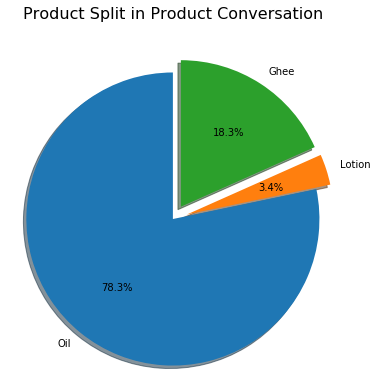

In [230]:
labels = ['Oil', 'Lotion', 'Ghee']
sizes = [oil_sz, lotion_sz, ghee_sz]
explode = (0, 0.1, 0.1)

fig1, ax1 = plt.subplots(figsize=(6, 6))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig1.suptitle("Product Split in Product Conversation", fontsize=16)
plt.show()

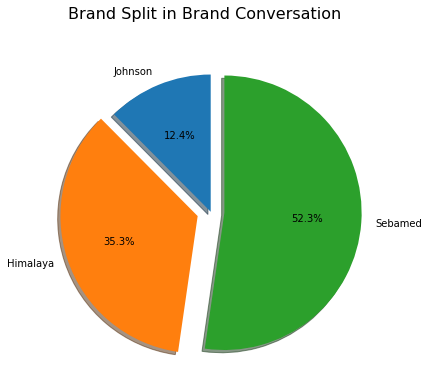

In [231]:
labels = ['Johnson', 'Himalaya', 'Sebamed']
sizes = [johnson_sz, himalaya_sz, sebamed_sz]
explode = (0, 0.1, 0.1)

fig1, ax1 = plt.subplots(figsize=(6, 6))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig1.suptitle("Brand Split in Brand Conversation", fontsize=16)
plt.show()

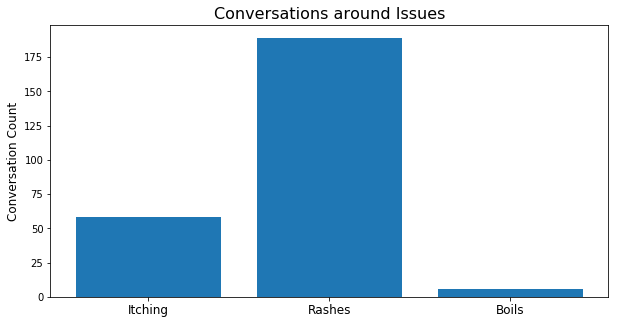

In [232]:
objects = ('Itching', 'Rashes', 'Boils')
y_pos = np.arange(len(objects))
performance = [itch_sz, rash_sz, boil_sz]

plt.figure(figsize=(10,5))
plt.bar(y_pos, performance, align='center', alpha=1)
plt.xticks(y_pos, objects, fontsize=12)
plt.ylabel('Conversation Count', fontsize=12)
plt.title('Conversations around Issues', fontsize=16)

plt.show()

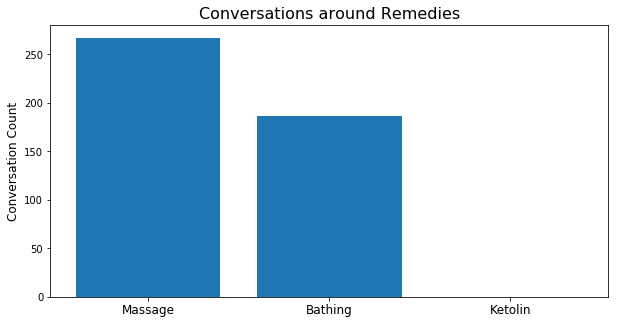

In [233]:
objects = ('Massage', 'Bathing', 'Ketolin')
y_pos = np.arange(len(objects))
performance = [massage_sz, bath_sz, ketolin_sz]

plt.figure(figsize=(10,5))
plt.bar(y_pos, performance, align='center', alpha=1)
plt.xticks(y_pos, objects, fontsize=12)
plt.ylabel('Conversation Count', fontsize=12)
plt.title('Conversations around Remedies', fontsize=16)

plt.show()

## Finding Other Keywords

In [234]:
# Products
print('Keywords For Oil:')
print(oil_related_words)
print('Keywords For Ghee:')
print(ghee_related_words)
print('Keywords For Lotion:')
print(lotion_related_words)

Keywords For Oil:
['oil', 'oil+', 'oil+castor', 'oil-', 'oil-free', 'oil.', 'oil..', 'oil..best', 'oil..vaise', 'oil..very', 'oil.ajawai', 'oil.fry', 'oil.i', 'oil.is', 'oil.ko', 'oil.or', 'oil/', 'oil/desi', 'oil/lotion', 'oilfree', 'oiliing', 'oiling', 'oilis', 'oilko', 'oilment', 'oilnis', 'oils', 'oils..', 'oilve', 'oily', 'oily..']
Keywords For Ghee:
['ghee', 'ghee.', 'ghee..', 'ghee.he', 'ghee/butter', 'gheee', 'gheeee', 'gheek']
Keywords For Lotion:
['lotion', 'lotion..', 'lotions']


In [235]:
# Issues
print('Keywords For Itching:')
print(itch_related_words)
print('Keywords For Rashes:')
print(rash_related_words)
print('Keywords For Boils:')
print(boil_related_words)

Keywords For Itching:
['itch', 'itching', 'itching..', 'itching..so', 'itchinv', 'itchy']
Keywords For Rashes:
['rashes', 'rashes..', 'rashes..people', 'rashes/', 'rashesh', 'rash']
Keywords For Boils:
['boils', 'boils..']


In [237]:
# Remedies
print('Keywords For Massage:')
print(massage_related_words)
print('Keywords For Bathing:')
print(bath_related_words)
print('Keywords For Ketolin:')
print(ketolin_related_words)

Keywords For Massage:
['massag', 'massage', 'massages', 'massaging']
Keywords For Bathing:
['bath', 'bath-session', 'bath.', 'bath..', 'bath..our', 'bath..so', 'batha', 'bathane', 'bathate', 'bathe', 'bathed', 'bathinda', 'bathing', 'bathing..n', 'bathirama', 'bathla', 'bathrey', 'bathroom', 'bathrum', 'baths..', 'bathtime']
Keywords For Ketolin:
[]


In [238]:
# Brands
print('Keywords For Himalaya:')
print(himalaya_related_words)
print('Keywords For Johnson:')
print(johnson_related_words)
print('Keywords For Sebamed:')
print(sebamed_related_words)

Keywords For Himalaya:
['himalai', 'himalay', 'himalaya', "himalaya's..", 'himalaya..', 'himalaya..its', 'himalaya/almond', 'himalayan', 'himalayas', 'himaliya', 'himalya', 'himalyan']
Keywords For Johnson:
['johnsn', 'johnson', 'johnsons']
Keywords For Sebamed:
['sebamad', 'sebamade', 'sebamaed', 'sebamed', 'sebamed..', 'sebamed.and']


In [288]:
data = [["Oil", oil_related_words], ["Ghee", ghee_related_words], ["Lotion", lotion_related_words],
        ["Itching", itch_related_words], ["Rashes", rash_related_words], ["Boils", boil_related_words],
        ["Bathing", bath_related_words], ["Massage", massage_related_words], ["Ketolin", ketolin_related_words],
        ["Himalaya", himalaya_related_words], ["Johnson", johnson_related_words], ['Sebamed', sebamed_related_words]
        ]
with pd.option_context('display.max_colwidth', 260):
    display(pd.DataFrame(data, columns=["Keywords", 'Alternate Keywords']))

,Keywords,Alternate Keywords
0,Oil,"[oil, oil+, oil+castor, oil-, oil-free, oil., oil.., oil..best, oil..vaise, oil..very, oil.ajawai, oil.fry, oil.i, oil.is, oil.ko, oil.or, oil/, oil/desi, oil/lotion, oilfree, oiliing, oiling, oilis, oilko, oilment, oilnis, oils, oils.., oilve, oily, oily..]"
1,Ghee,"[ghee, ghee., ghee.., ghee.he, ghee/butter, gheee, gheeee, gheek]"
2,Lotion,"[lotion, lotion.., lotions]"
3,Itching,"[itch, itching, itching.., itching..so, itchinv, itchy]"
4,Rashes,"[rashes, rashes.., rashes..people, rashes/, rashesh, rash]"
5,Boils,"[boils, boils..]"
6,Bathing,"[bath, bath-session, bath., bath.., bath..our, bath..so, batha, bathane, bathate, bathe, bathed, bathinda, bathing, bathing..n, bathirama, bathla, bathrey, bathroom, bathrum, baths.., bathtime]"
7,Massage,"[massag, massage, massages, massaging]"
8,Ketolin,[]
9,Himalaya,"[himalai, himalay, himalaya, himalaya's.., himalaya.., himalaya..its, himalaya/almond, himalayan, himalayas, himaliya, himalya, himalyan]"


In [295]:
# 50 most common words in the conversation
pd.DataFrame(freq_dist.most_common(50), columns=['words', 'occurences']).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
words,baby,hai,u,se,ho,n't,ko,k,'s,dear,yes,n,ki,hi,bhi,give,milk,also,use,ka,oil,nhi,normal,water,time,one,month,good,months,b,like,kya,weight,..,ur,2,1,ke,aap,mam,thanks,try,hota,plz,take,tha,thank,happy,please,mera
occurences,6143,3760,3040,2825,2728,2656,2584,2545,2532,2529,2511,2458,2407,2335,2219,2206,2203,2117,2049,1925,1828,1803,1658,1577,1558,1557,1553,1512,1448,1395,1342,1296,1282,1246,1244,1219,1194,1177,1161,1126,1113,1106,1079,1070,1053,1052,1046,1046,1044,993


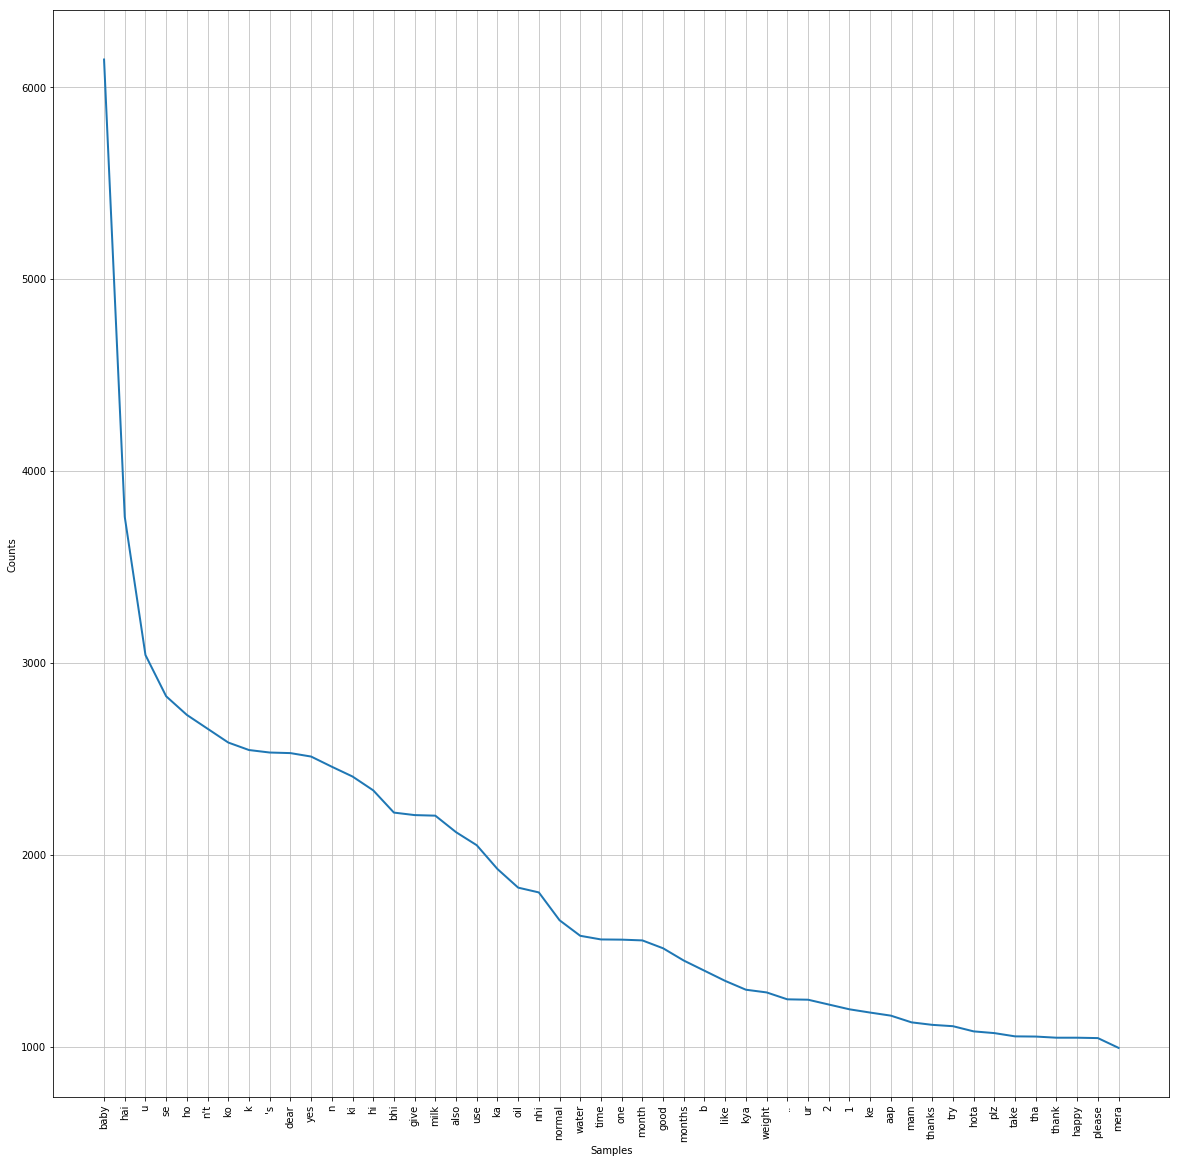

In [304]:
# Frequecy Plot For 50 Most common words in the conversation
freq_dist.plot(50, cumulative=False)

In [307]:
# These words might be considered useless as they occurs only once in the whole conversation.
print(freq_dist.hapaxes()) # words occuring only once in the text

['haryani', 'bookstores', 'crossword', 'thukral', 'author-', 'roald', 'war', 'whimsical', 'matilda', 'charlie', 'factory', 'solo', 'nasreen', 'pansare', 'grasshopper', 'read..', 'aarthy', 'thirsty', 'crow', 'khilake', 'bhejio..bcha', 'entr', 'well..but', 'ousko', 'pukish', 'bedding', '/b07ds6cgnr/ref=mp_s_a_1_1_sspa', 'ants..', 'athira', 'sarath', 'konalika', 'maindola', 'ko.waise', 'hii..fends', '2options', '3capsule', 'hog', '2-2hours', 'supple', 'pio..dood', 'aapko..fm', 'aapko..lekin', 'rahega..uska', 'pit', 'dasmularishth..ayurvedic', '+9month', 'aachey', 'karsaktey', 'manye', 'apnye', 'vegi', 'samajhjari', 'maij', 'karvne', 'uthu', '5hrs', 'upt', 'mensis', 'h..mujhe', '1y5', 'best..silver', 'niwaya', 'karaiye..', 'gunshot..', 'sudhrshan', 'rkho..kaam', '.jha', '2-3hours', '48days', 'dkhlo', 'bnai', 'bney', 'redekar', 'salvi', 'goria', 'kundur', 'dony', 'personl', 'grudges', 'tylenol', '1nd1/2', 'h.aap', '5-5', 'thrombophob.kya', 'naila', 'behtne', 'nay', 'mujay', 'pherne', 'crazz

In [313]:
# A collocation is a sequence of words that occur together unusually often.
text.collocations(50)

happy birthday; rate translation; olive oil; drreetika inderjeet;
inderjeet juneja; meri beti; coconut oil; peanut butter; mera beta;
n't worry; god bless; jeera water; birthday happy; cow milk; yes yes;
months old; little bit; shruti sinha; nisha tiwari; hota hai; dry
fruits; singh akher; archana ganeshgiri; dinesh vernekar; shruthi
dinesh; desi ghee; years old; neetu singh; empty stomach; weight loss;
take care; nan pro; siddhi sharma; papaya leaf; green tea; thanks
dear; formula milk; shipra upadhyay; mere bete; kanak singh;
//m.facebook.com/groups/334087516998050 view=permalink; home remedies;
consult doctor; birthday beta; n't know; top load; mera baby; mustard
oil; kya kru; mother sparsh
